# Exploratory data analysis for the dataset
## Data exploration has been conducted in this notebook, where the columns have been narrowed down to only include the essential ones.

In [2]:
# importing the required packages
import pandas as pd
import matplotlib.pyplot as plt

import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /Users/abhishek/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [34]:
# read the dataset
clinical_text_df = pd.read_csv("mtsamples.csv")
clinical_text_df["medical_specialty"] = clinical_text_df["medical_specialty"].apply(
    lambda x: str.strip(x)
)

print(clinical_text_df.columns)
clinical_text_df.head(5)

Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords'],
      dtype='object')


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [35]:
# function to visualise the bar plot
def plotNumberOfClasses(count):
    plt.figure(figsize=(16, 4))
    _ = plt.bar(count.index, count.values)
    plt.xticks(rotation=-90)
    plt.show()

In [36]:
clinical_text_df["medical_specialty"].describe()

count        4999
unique         40
top       Surgery
freq         1103
Name: medical_specialty, dtype: object

In [37]:
clinical_text_df = clinical_text_df[clinical_text_df["transcription"].notna()]
category_count = clinical_text_df["medical_specialty"].value_counts()

print(category_count)

medical_specialty
Surgery                          1088
Consult - History and Phy.        516
Cardiovascular / Pulmonary        371
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  224
Neurology                         223
SOAP / Chart / Progress Notes     166
Urology                           156
Obstetrics / Gynecology           155
Discharge Summary                 108
ENT - Otolaryngology               96
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    61
Psychiatry / Psychology            53
Office Notes                       50
Podiatry                           47
Dermatology                        29
Cosmetic / Plastic Surgery         27
Dentistry                       

## Bar plot for visualising the the count of each 'medical_specialty'

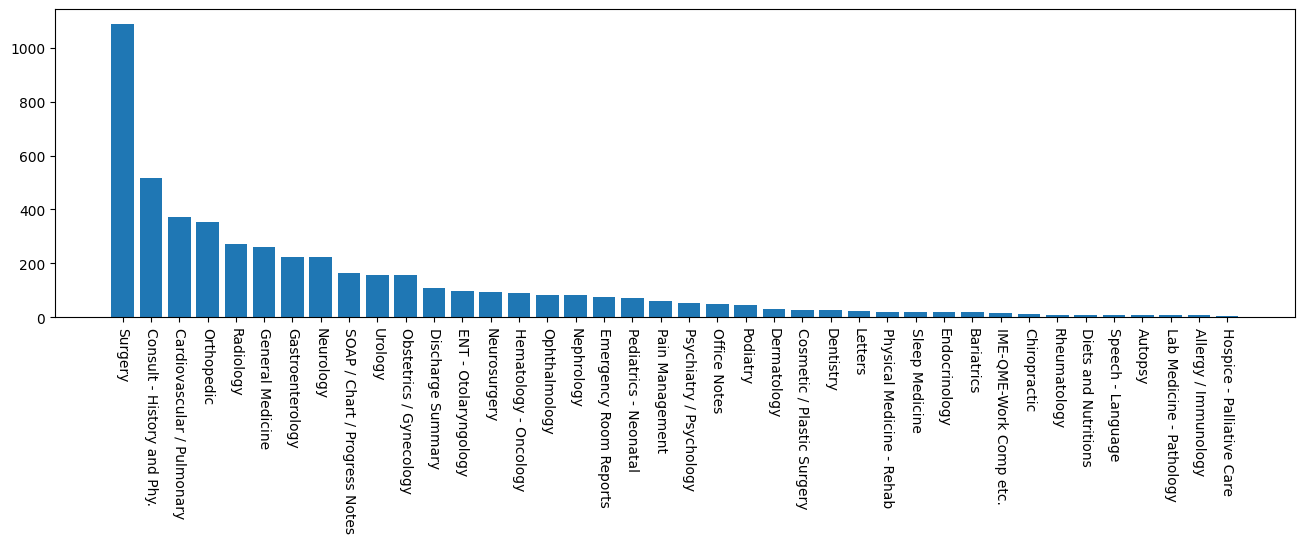

In [38]:
plotNumberOfClasses(category_count)

 #### Observations 
 - The dataset is highly imbalanced
 - A lot of lavels have only a small number of transcriptions

### Step 1: Filter out the labels where medical_specialty count is less than 50 

In [39]:
filtered_data_categories = category_count[category_count > 50]
print(filtered_data_categories)

medical_specialty
Surgery                          1088
Consult - History and Phy.        516
Cardiovascular / Pulmonary        371
Orthopedic                        355
Radiology                         273
General Medicine                  259
Gastroenterology                  224
Neurology                         223
SOAP / Chart / Progress Notes     166
Urology                           156
Obstetrics / Gynecology           155
Discharge Summary                 108
ENT - Otolaryngology               96
Neurosurgery                       94
Hematology - Oncology              90
Ophthalmology                      83
Nephrology                         81
Emergency Room Reports             75
Pediatrics - Neonatal              70
Pain Management                    61
Psychiatry / Psychology            53
Name: count, dtype: int64


 Bar plot for visualising the the count of each 'medical_specialty' after removing the categories where count of medical_speciality < 50 

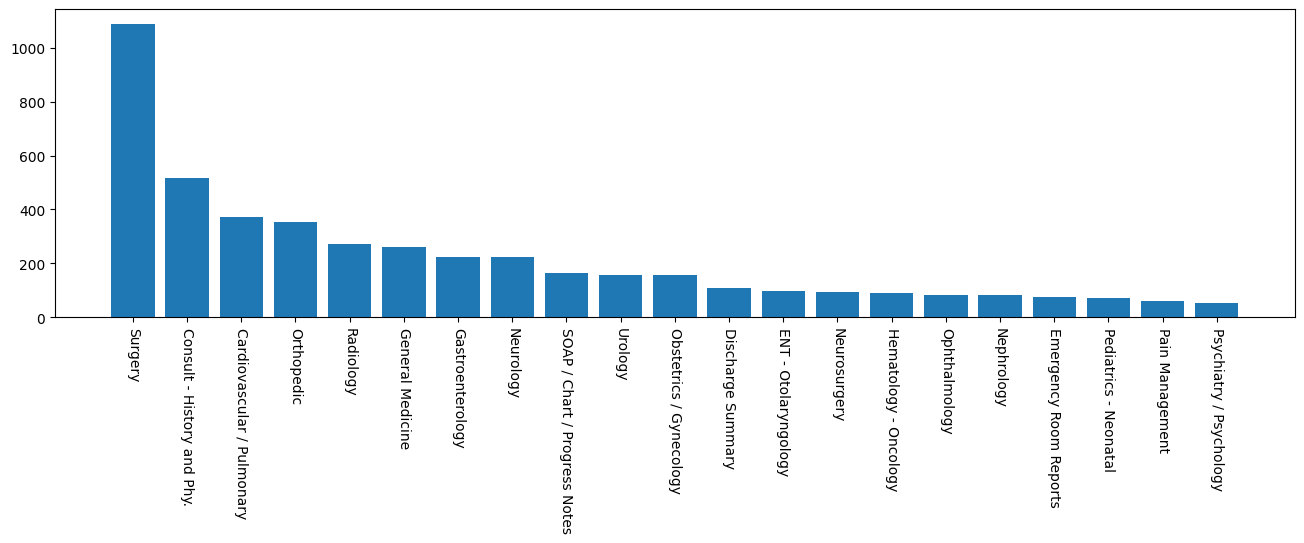

In [40]:
plotNumberOfClasses(filtered_data_categories)

#### Obervations:
- Some of the labels like "Surgery" that do not mention a subspecialty of medicine. Also, Surgery could belong to any of the categories; since, it is the superset of classes like cardiology, orthopaedics etc. Similarly General Medicine, Pain Management all are supersets of other classes.

> Conclusion: We should drop non-medical classes.


#### Columns to be dropped
- 'SOAP / Chart / Progress Notes'
- 'Emergency Room Reports'
- 'metabolics / Gastroenterology'
- 'Surgery'
- 'Consult - History and Phy.'
- Pain Management
- Discharge Summary
- General Medicine



In [52]:
def drop_redundant_labels(df):
    df = df.drop(df[df["transcription"].isna()].index)

    columns_to_be_removed = [
        "SOAP / Chart / Progress Notes",
        "Consult - History and Phy.",
        "Surgery",
        "metabolics / Gastroenterology",
        "Emergency Room Reports",
        "General Medicine",
        "Pain Management",
        "Discharge Summary",
    ]

    df = df[~df["medical_specialty"].isin(columns_to_be_removed)]

    return df


filtered_data = clinical_text_df[
    clinical_text_df["medical_specialty"].isin(filtered_data_categories.index.tolist())
]
filtered_data = drop_redundant_labels(filtered_data)

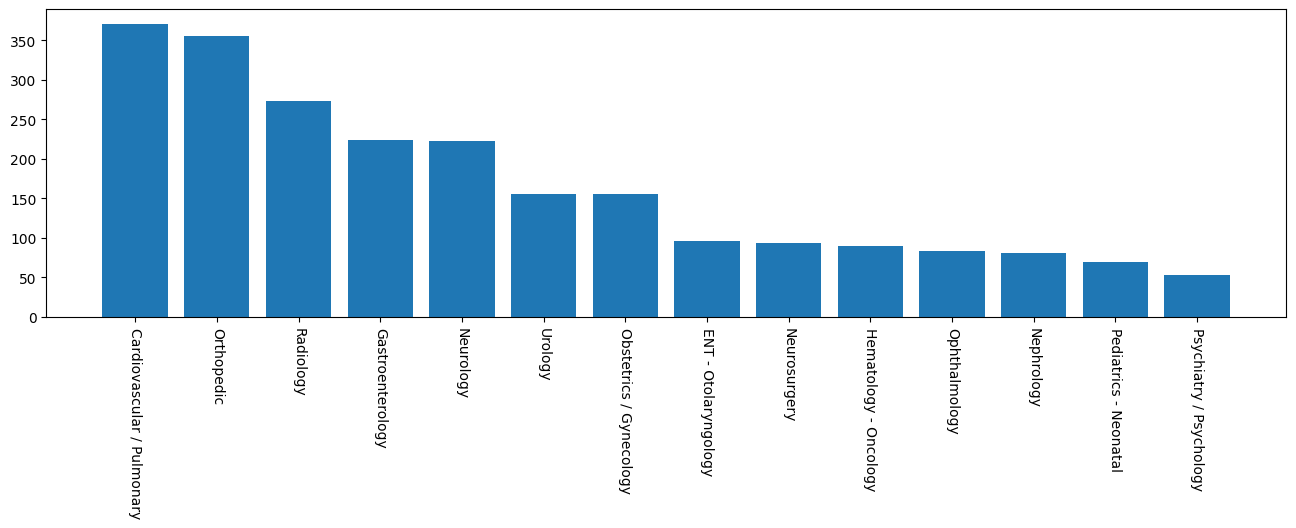

In [55]:
plotNumberOfClasses(filtered_data["medical_specialty"].value_counts())

#### Combining Similar Labels
- Neurosurgery is a branch of Neurology
- Nephrology is a branch of Urology.
> Therefore, we combine these classes. 


In [57]:
def combine_labels(df):
    df.loc[df.medical_specialty == "Neurosurgery", "medical_specialty"] = "Neurology"
    df.loc[df.medical_specialty == "Nephrology", "medical_specialty"] = "Urology"

    return df


filtered_data = combine_labels(filtered_data)

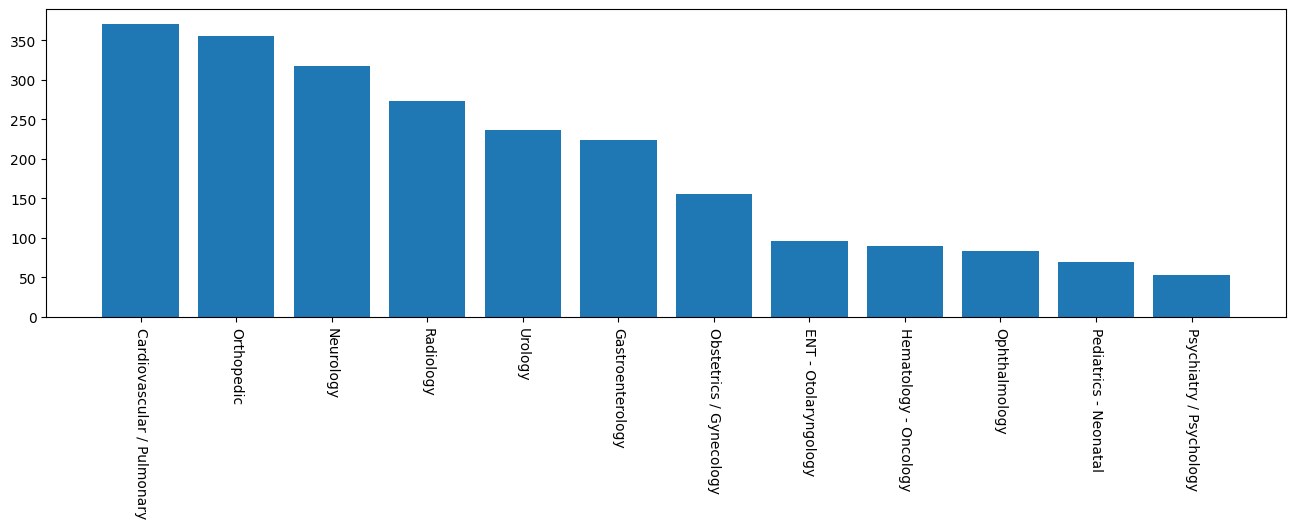

In [58]:
plotNumberOfClasses(filtered_data["medical_specialty"].value_counts())

In [59]:
data = filtered_data[["transcription", "medical_specialty"]]
data.shape

(2324, 2)

In [60]:
data["medical_specialty"].value_counts()

medical_specialty
Cardiovascular / Pulmonary    371
Orthopedic                    355
Neurology                     317
Radiology                     273
Urology                       237
Gastroenterology              224
Obstetrics / Gynecology       155
ENT - Otolaryngology           96
Hematology - Oncology          90
Ophthalmology                  83
Pediatrics - Neonatal          70
Psychiatry / Psychology        53
Name: count, dtype: int64

In [61]:
final_label_list = data["medical_specialty"].unique()
print(final_label_list)

['Cardiovascular / Pulmonary' 'Neurology' 'Urology' 'Radiology'
 'Psychiatry / Psychology' 'Pediatrics - Neonatal' 'Orthopedic'
 'Ophthalmology' 'Obstetrics / Gynecology' 'Hematology - Oncology'
 'Gastroenterology' 'ENT - Otolaryngology']


## Conclusion

Final List of labels to be used
```
 [
    'Cardiovascular / Pulmonary',
    'Neurology',
    'Urology',
    'Radiology',
    'Psychiatry / Psychology',
    'Pediatrics - Neonatal',
    'Orthopedic',
    'Ophthalmology',
    'Obstetrics / Gynecology',
    'Hematology - Oncology',
    'Gastroenterology',
    'ENT - Otolaryngology',
 ] 
 ```